<a href="https://colab.research.google.com/github/deborahchang/projects/blob/Mortality_Project/EDA_%2B_LR_Data_102_Final_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive


drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Mortality - Data 102/In_hospital_mortality.csv' # please change to 'In_hospital_mortality.csv'
mortality = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
mortality.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [ ]:
mortality.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

Link to our proposal: https://docs.google.com/document/d/1QfpcDD5wOZ9-yUt8zdUWcXqv9lLYhE3tuULxoUNjcn0/edit

**EDA**

In [ ]:
# preprocessing steps

gender_mapping = {1: 'Male', 2: 'Female'}
mortality['gender_label'] = mortality['gendera'].map(gender_mapping)
mortality = mortality[['age', 'gender_label', 'BMI', 'Systolic blood pressure', 'Diastolic blood pressure', 'diabetes', 'outcome']].dropna()
mortality['outcome'] = mortality['outcome'].astype(int)

In [ ]:
mortality.head()

,age,gender_label,BMI,Systolic blood pressure,Diastolic blood pressure,diabetes,outcome
0,72,Male,37.588179,155.866667,68.333333,1,0
2,83,Female,26.572634,135.333333,61.375000,0,0
3,43,Female,83.264629,126.400000,73.200000,0,0
4,75,Female,31.824842,156.560000,58.120000,0,0
5,76,Male,24.262293,118.100000,52.950000,0,0


In [ ]:
mortality.describe()

,age,BMI,Systolic blood pressure,Diastolic blood pressure,diabetes,outcome
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,73.689402,30.211160,117.575532,59.559210,0.433368,0.118573
std,13.550019,9.351745,17.209018,10.587133,0.495801,0.323455
min,19.000000,13.346801,75.000000,24.736842,0.000000,0.000000
25%,65.000000,24.326438,105.130435,52.263158,0.000000,0.000000
50%,77.000000,28.352286,115.545455,58.755556,0.000000,0.000000
75%,85.000000,33.641425,128.000000,65.434783,1.000000,0.000000
max,99.000000,104.970366,203.000000,107.000000,1.000000,1.000000


1. Visualization of BMI for each whether or not having diabetes: This visualization is critical in that it motivates asking the causal question of whether higher BMI causes the diagnoses of diabetes. From our histogram, we can observe there exists a difference between the distribution of BMI for diabetes and non-diabetes group, with diabetes group generally having higher BMI than non-diabetes group. This trend indicates a possible cause from BMI on diabetes.

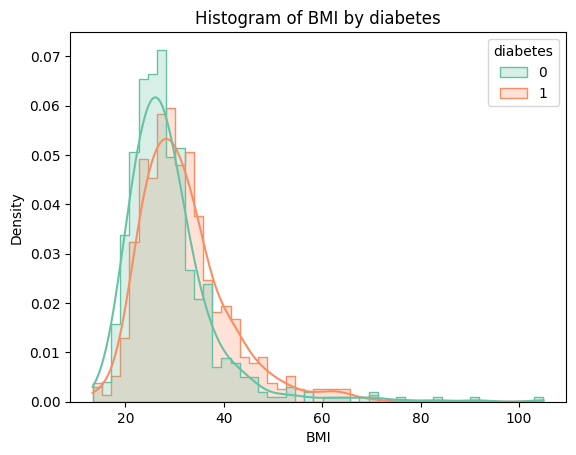

In [ ]:
sns.histplot(data=mortality, x='BMI', hue='diabetes', element='step', stat='density', common_norm=False, kde=True, palette='Set2')

plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Histogram of BMI by diabetes')
plt.show()

2. The following visualizations are built to discover potential confounders within the causal relationship specified above. We hypothesize that gender could be a confounder that could affect both Diabetes and BMI, so we plot gender with respect to Diabetes and BMI respectively. We discovered that compared with female, that are more males who have diabetes and less males who don't have diabetes, which indicate a potential associate between gender and diabetes. Moreover, the histogram demonstrates a higher density of male on younger ages for males than females, which possibly indicate an associate between gender and BMI.

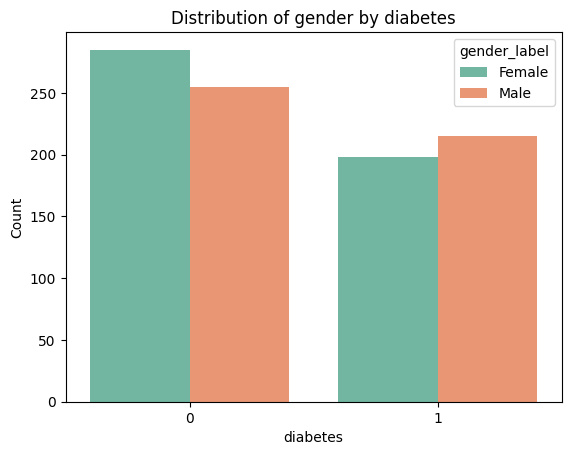

In [ ]:
# Visualization of gender on diabetes

sns.countplot(x='diabetes', hue='gender_label', data=mortality, palette='Set2')

plt.xlabel('diabetes')
plt.ylabel('Count')
plt.title('Distribution of gender by diabetes')
plt.show()

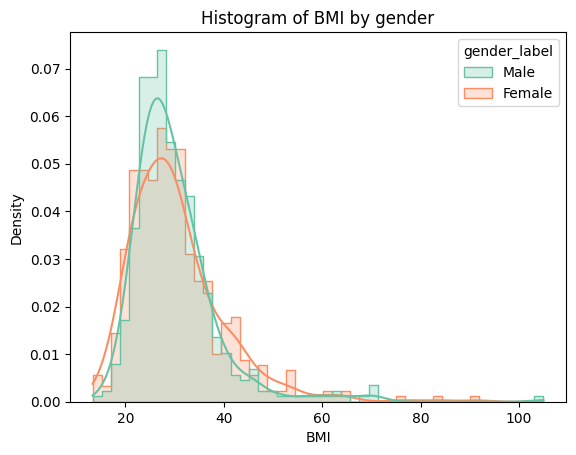

In [ ]:
# Visualization of BMI for each gender

sns.histplot(data=mortality, x='BMI', hue='gender_label', element='step', stat='density', common_norm=False, kde=True, palette='Set2')

plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Histogram of BMI by gender')
plt.show()

3. Visualization of age of people who died and people who did not die. We are interested in using multiple linear regression on predicting people's death using other variables. We ploted the histogram of age seperated by outcome, and we found a higher density of older people for those who died than those who did not die. This indicate a potential predictive power of age as a varaible within the multiple linear regression.

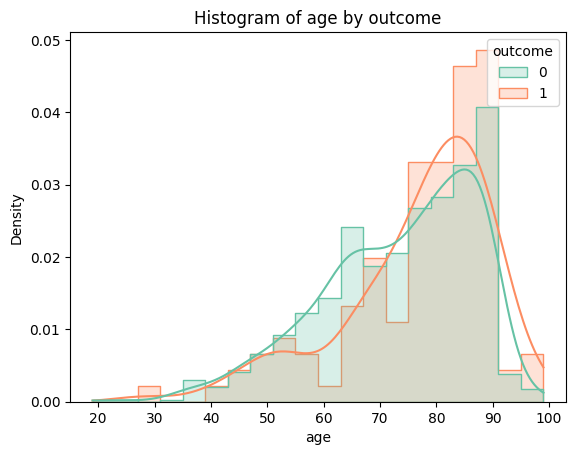

In [ ]:
sns.histplot(data=mortality, x='age', hue='outcome', element='step', stat='density', common_norm=False, kde=True, palette='Set2')

plt.xlabel('age')
plt.ylabel('Density')
plt.title('Histogram of age by outcome')
plt.show()

4. Additionally, we need to confirm that the class labels is balanced within our dataset. This ensures the accuracy of our model and we minimize the bias within our prediction. We do see that people who died are much fewer than the people who did not, which indicates a necessity of using techniques such as resampling.

<ipython-input-11-e7d0fdfe2228>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='outcome', data = mortality, palette='Set2')


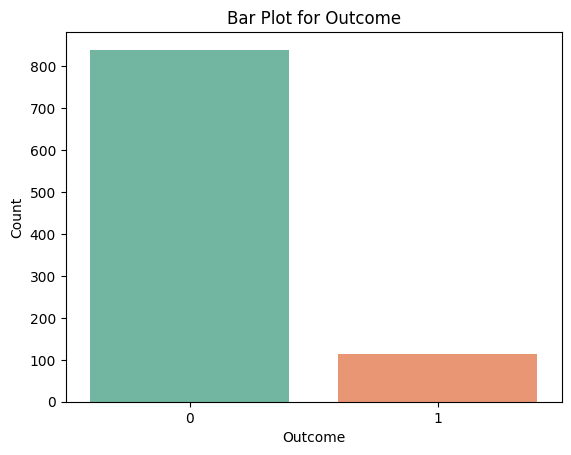

In [ ]:
sns.countplot(x='outcome', data = mortality, palette='Set2')

plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Bar Plot for Outcome')
plt.show()

In [ ]:
# Ages were unevenly distributed, so we grouped them in groups

Q1 = mortality['BMI'].quantile(0.25)
Q3 = mortality['BMI'].quantile(0.75)
IQR = Q3 - Q1
# fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering
filtered_data = mortality[(mortality['BMI'] >= lower_bound) & (mortality['BMI'] <= upper_bound)]

#age groups
age_counts = filtered_data['age'].value_counts().sort_index()
age_bins = pd.cut(filtered_data['age'], bins=range(10, 110, 10), right=False)
age_group_counts = filtered_data.groupby(age_bins)['age'].count()
age_group_counts

age
[10, 20)       1
[20, 30)       0
[30, 40)      10
[40, 50)      34
[50, 60)      81
[60, 70)     171
[70, 80)     216
[80, 90)     369
[90, 100)     29
Name: age, dtype: int64

In [ ]:
# we then filtered because these age groups were also unevenly distributed
# we then groupby diabetes to find chance of dieing and having diabetes
filtered_data_ages_40_to_99 = mortality[(mortality['age'] >= 40) & (mortality['age'] <= 99)]
age_bins_40_to_99 = pd.cut(filtered_data_ages_40_to_99['age'], bins=range(40, 110, 10), right=False)
average_diabetes_per_age_group = filtered_data_ages_40_to_99.groupby(age_bins_40_to_99)['diabetes'].mean()
average_diabetes_per_age_group

age
[40, 50)     0.465116
[50, 60)     0.593407
[60, 70)     0.481081
[70, 80)     0.429864
[80, 90)     0.382114
[90, 100)    0.413793
Name: diabetes, dtype: float64

In [ ]:
age_diabetes_corr = filtered_data_ages_40_to_99['age'].corr(filtered_data_ages_40_to_99['diabetes'])
age_diabetes_corr # as age increases, the likelihood of having diabetes decreases slightly.

-0.11542167082453114

In [ ]:
age_bmi_corr = filtered_data_ages_40_to_99['age'].corr(filtered_data_ages_40_to_99['BMI'])
age_bmi_corr #as age increases, BMI tends to decrease.

-0.3687990376493193